# Carbon Dioxide Emissions Exploratory Data Analysis<a id='Data_wrangling'></a>

## Contents<a id='Contents'></a>
  * [Introduction](#Introduction)
  
  * [Import Libraries and Load Data](#Imports)
  
  * [Objectives](#Objectives)
  
  * [Exploratory Data Analysis](#Explore_The_Data)
  
  * [Conclusion](#Summary)

## Introduction<a id='#Introduction'></a>

We have cleaned the data and now it is time to perform data analysis on the different features in our dataset and try to establish if there are any particular relationships between the features. It is very important to find the patterns between features in order to provide relevant information from the dataset.

## Import Libraries and Load Data<a id='#Imports'></a>

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import plotly.express as px
import plotly.graph_objects as go


In [77]:
pd.read_csv('df.csv', index_col=False)

,Unnamed: 0,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,ACURA,ILX,COMPACT,2.0,4,AS5,Automatic,PREMIUM GASOLINE,9.9,6.7,8.5,196
1,1,ACURA,ILX,COMPACT,2.4,4,M6,Manual,PREMIUM GASOLINE,11.2,7.7,9.6,221
2,2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Automatic,PREMIUM GASOLINE,6.0,5.8,5.9,136
3,3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Automatic,PREMIUM GASOLINE,12.7,9.1,11.1,255
4,4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Automatic,PREMIUM GASOLINE,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Automatic,PREMIUM GASOLINE,10.7,7.7,9.4,219
5987,7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Automatic,PREMIUM GASOLINE,11.2,8.3,9.9,232
5988,7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Automatic,PREMIUM GASOLINE,11.7,8.6,10.3,240
5989,7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Automatic,PREMIUM GASOLINE,11.2,8.3,9.9,232


## Objectives<a id='#Objectives'></a>

* Build data profiles, tables, and visualizations
* Explore data relationships using statistical analysis
* Select important/interesting features

## Exploratory Data Analysis<a id='#Objectives'></a>

In [81]:
df.pop("Unnamed: 0")

0          0
1          1
2          2
3          3
4          4
        ... 
5986    7380
5987    7381
5988    7382
5989    7383
5990    7384
Name: Unnamed: 0, Length: 5991, dtype: int64

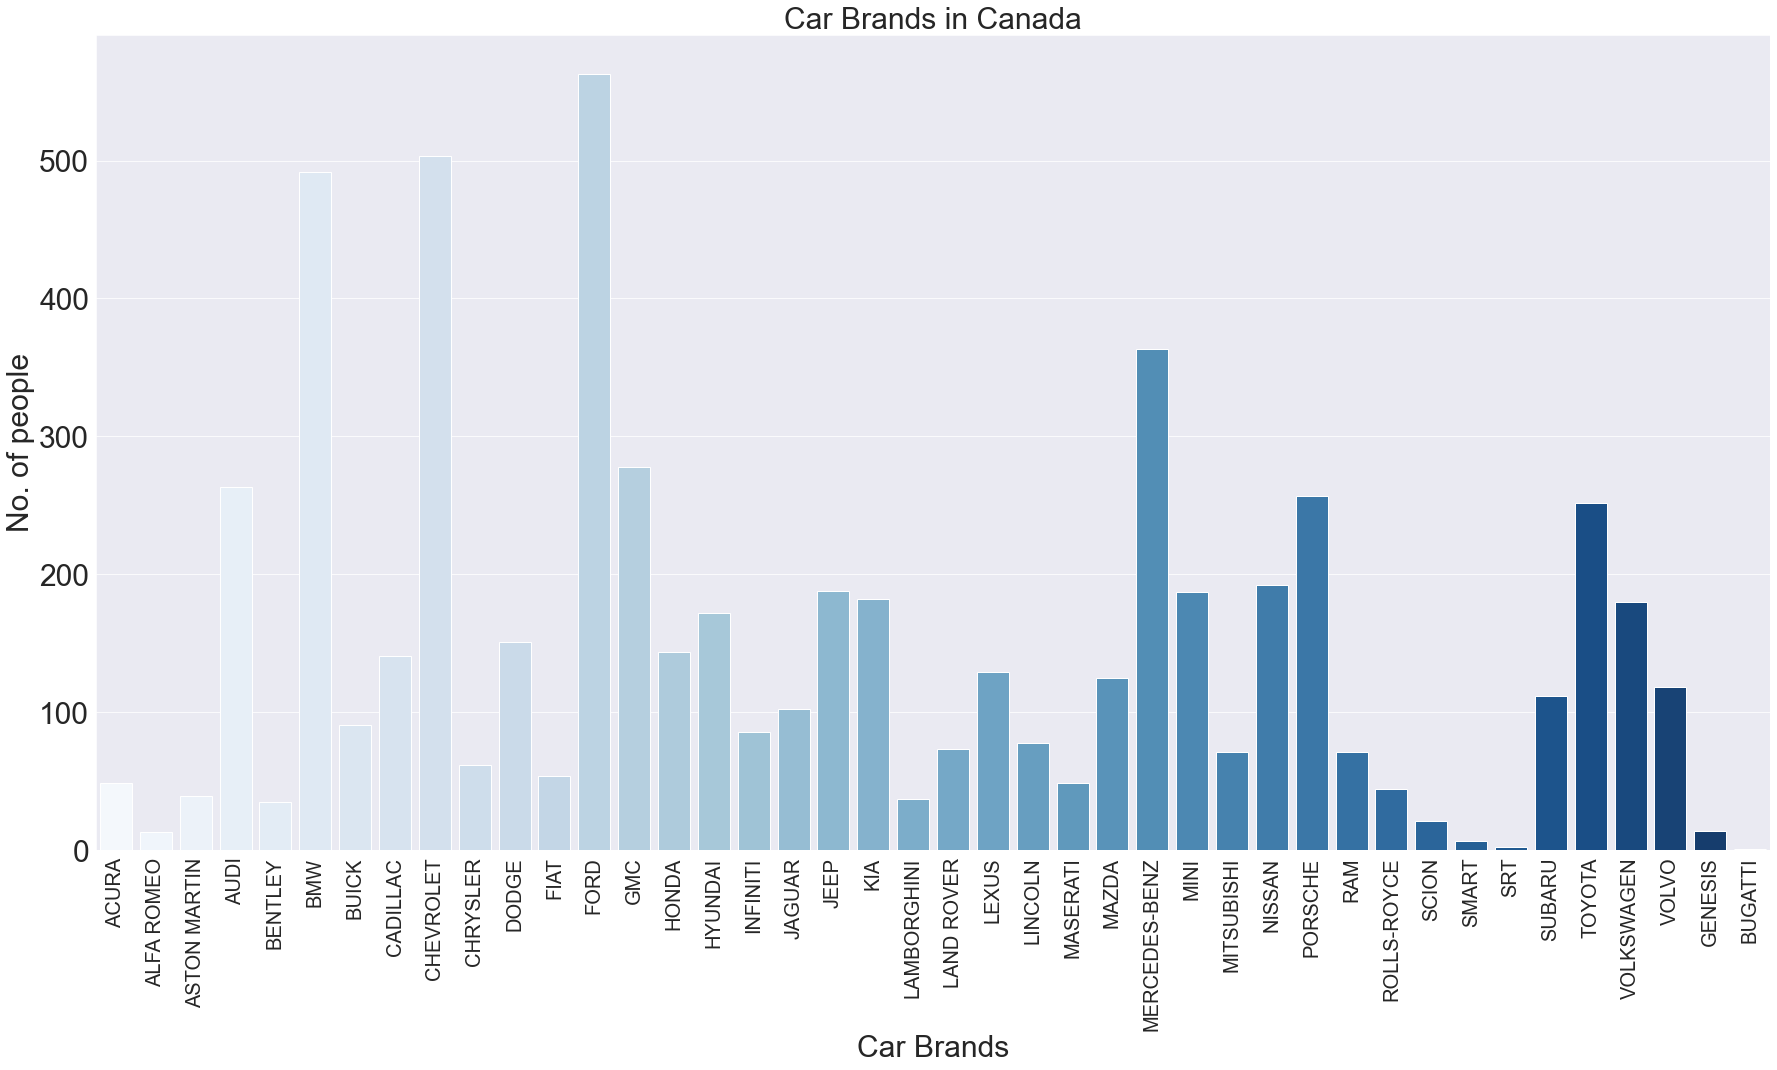

In [83]:
#bar graph for the car brands used in canada
fig, c = plt.subplots(figsize = (30,15))
c = sns.countplot(x = 'Make',data=df,palette='Blues')
c.set_xlabel('Car Brands', fontsize = 30)
c.set_ylabel ('No. of people', fontsize = 30)
c.set_title('Car Brands in Canada',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30);

In [84]:
#grouping the data by make and model
most_fuel_means = df.groupby(['Make','Model'])[['CO2 Emissions(g/km)']].mean()
CO2_emissions=most_fuel_means.sort_values(by='CO2 Emissions(g/km)', ascending=False).head(5)
CO2_emissions

CO2 Emissions(g/km)
Make          Model                                         
BUGATTI       CHIRON                                   522.0
FORD          E350 WAGON                               488.0
MERCEDES-BENZ AMG G 65                                 472.0
LAMBORGHINI   AVENTADOR S ROADSTER                     464.0
              AVENTADOR ROADSTER LP 740                461.0

From this table, car company 'BUGATI' and model CHIRON has the highest fuel consumption in the city with an average of 26.8 L/100 km.

In [85]:
#Looking at Ford Models specifically since it is the most popular company for cars used in Canada
#Which Ford Model consumes the most fuel and is also producing the highest CO2 emissions?
ford=df[df.Make == 'FORD']
ford.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Transmission_Type,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
351,FORD,E350 WAGON FFV,VAN - PASSENGER,5.4,8,A4,Automatic,ETHANOL,26.7,20.5,23.9,382
348,FORD,E150 WAGON FFV,VAN - PASSENGER,4.6,8,A4,Automatic,ETHANOL,25.5,20.0,23.0,368
346,FORD,E150 VAN FFV,VAN - CARGO,5.4,8,A4,Automatic,ETHANOL,24.9,19.6,22.5,360
362,FORD,EXPEDITION 4X4 FFV,SUV - STANDARD,5.4,8,A6,Automatic,ETHANOL,24.5,18.0,21.6,346
344,FORD,E150 VAN FFV,VAN - CARGO,4.6,8,A4,Automatic,ETHANOL,24.1,19.2,21.9,350


From this table, Ford Model "E350 WAGON FFV" consumes the most fuel in the city with an average fuel consumption of 26.7(L/100 km)

In [87]:
df_ford_model=ford["Model"].value_counts().reset_index().rename(columns={'index':'Model','Model':'Count'}).head(10)
df_ford_model


,Model,Count
0,MUSTANG,33
1,F-150 FFV,32
2,F-150 FFV 4X4,31
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,EDGE AWD,17
7,MUSTANG CONVERTIBLE,17
8,FUSION,15
9,ESCAPE AWD,12


Most popular Ford Model is Mustang in Canada

In [88]:
grouped_df = df.groupby(['Make']).agg({'CO2 Emissions(g/km)': ['mean', 'min', 'max', 'median']})
grouped_df.columns = ['CO2 Emissions(g/km)_mean', 'CO2 Emissions(g/km)_min', 'CO2 Emissions(g/km)_max', 'CO2 Emissions_median']
grouped_df = grouped_df.reset_index()
grouped_df.head(5)

,Make,CO2 Emissions(g/km)_mean,CO2 Emissions(g/km)_min,CO2 Emissions(g/km)_max,CO2 Emissions_median
0,ACURA,222.428571,136,267,228.0
1,ALFA ROMEO,236.384615,193,292,218.0
2,ASTON MARTIN,344.282051,264,450,345.0
3,AUDI,252.676806,177,409,242.0
4,BENTLEY,367.914286,291,465,373.0


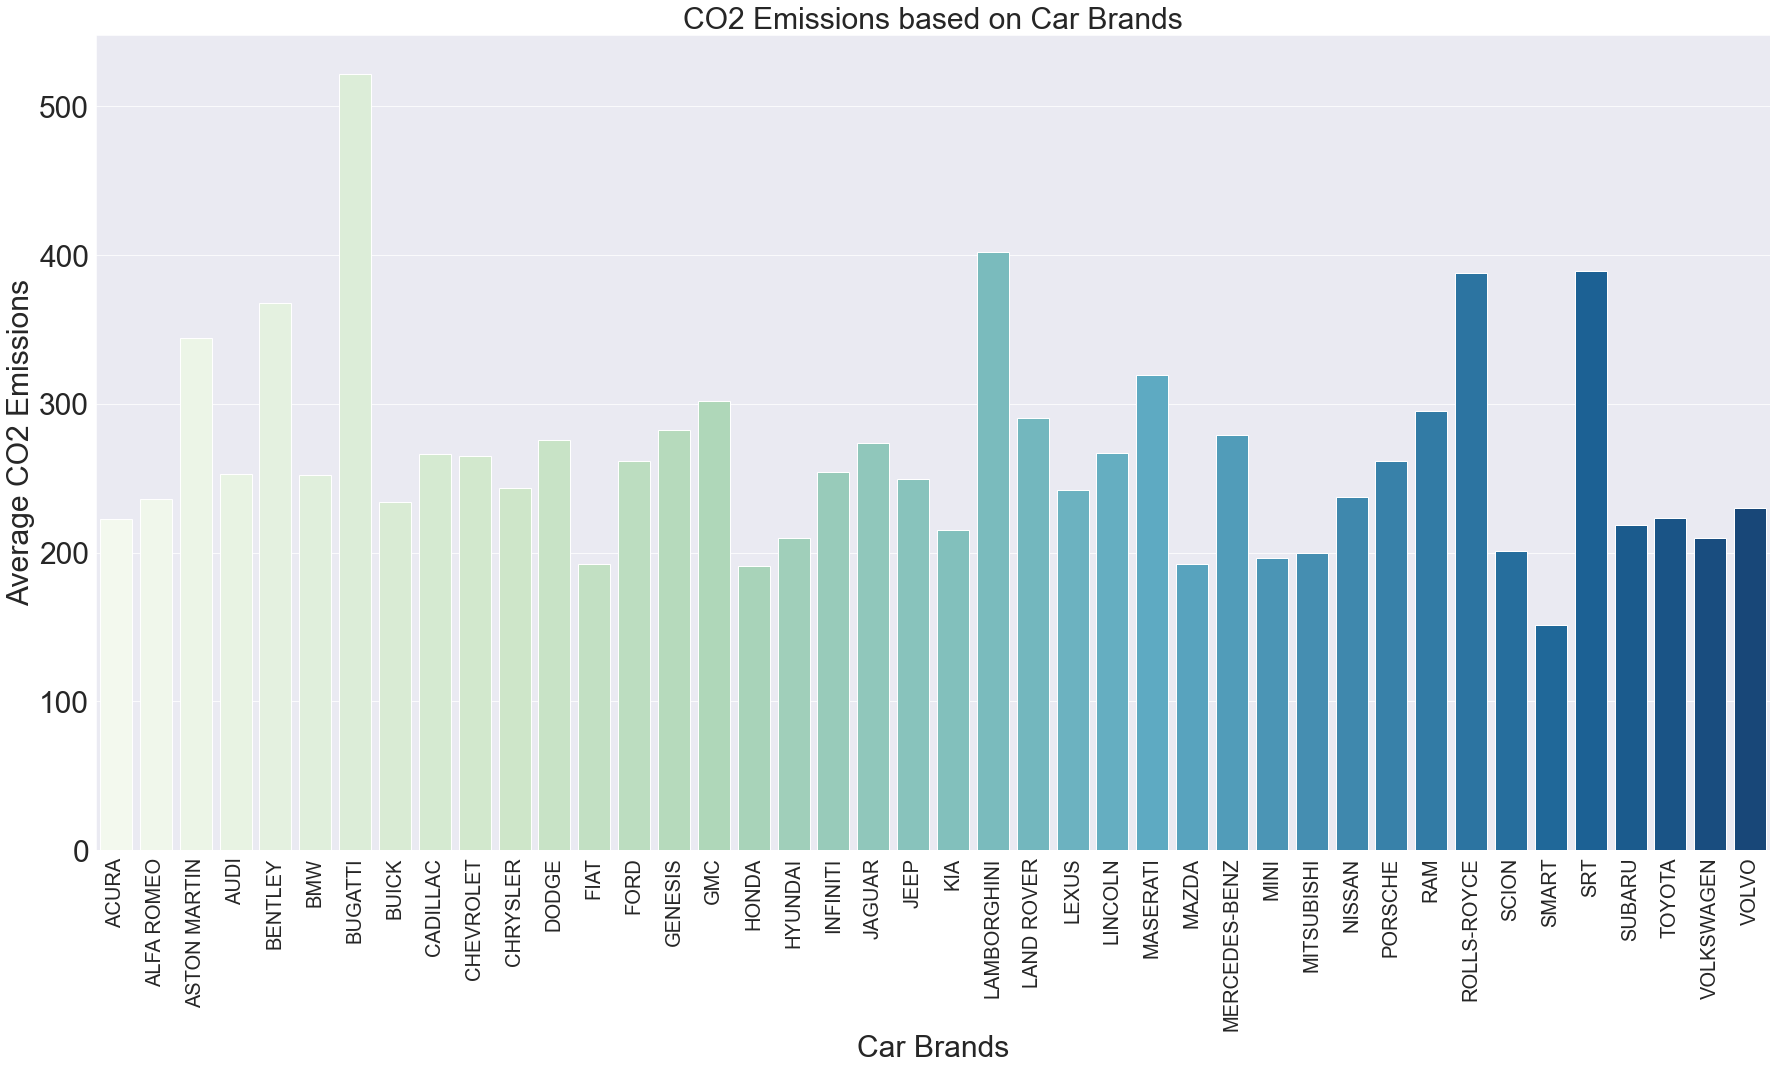

In [128]:
fig, c = plt.subplots(figsize = (30,15))
c = sns.barplot(x = 'Make',y='CO2 Emissions(g/km)_mean',data=grouped_df, palette="GnBu" )
c.set_xlabel('Car Brands', fontsize = 30)
c.set_ylabel ('Average CO2 Emissions', fontsize = 30)
c.set_title('CO2 Emissions based on Car Brands',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=30);

Car brand BUGATTI has the highest emissions, followed by Lamborghini, rolls-royce and SRT.

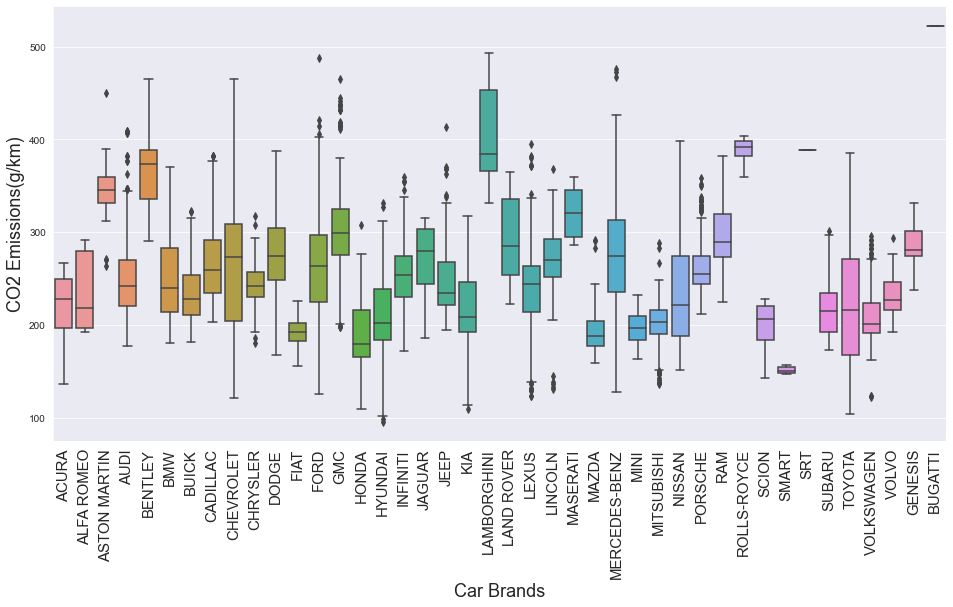

In [90]:
plt.subplots(figsize=(16, 8))
sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation='vertical',fontsize=15)
plt.xlabel('Car Brands',fontsize=18)
plt.ylabel('CO2 Emissions(g/km)',fontsize=18);

Box plot for the distribution of CO2 Emissions based on the Car brands. Some car brands are showing variability in the CO2 distributions such as LEXUS, LINCOLN, MERCEDES-BENZ, VOLKSWAGEN AND AUDI. This could be due to the change in engine size and cylinders which could directly affect the fuel consumption in the car. 

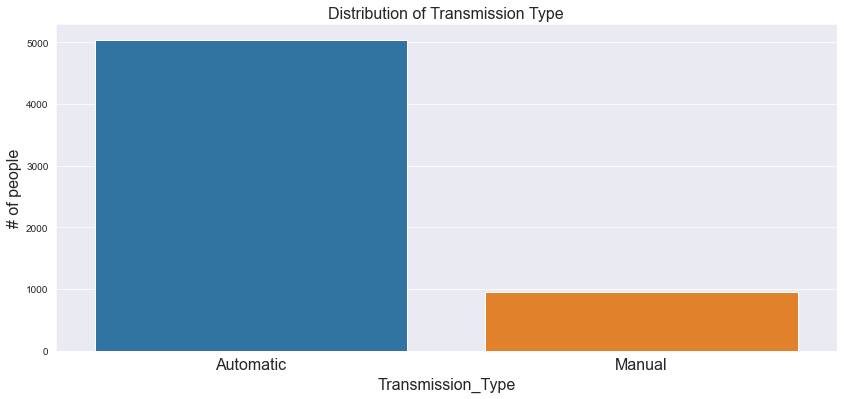

In [142]:
plt.subplots(figsize=(14, 6))
sns.countplot(data=df,x='Transmission_Type')
plt.title('Distribution of Transmission Type', fontsize=16)
plt.xlabel('Transmission_Type',fontsize=16)
plt.xticks(fontsize=16)
plt.ylabel('# of people',fontsize=16);


In [152]:
transmission_distr =df['Transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='Transmission', names='index', color_discrete_sequence=px.colors.sequential.Sunset)
fig.update_layout(title="Transmission Distribution")
fig.show()

In [91]:
#Grouping the data by vehicle class
grouped_df_class = df.groupby('Vehicle Class').agg({'CO2 Emissions(g/km)': ['mean', 'count']})
grouped_df_class.columns = ['CO2 Emissions(g/km)_mean', 'Number of Vehicles']
grouped_df_class=grouped_df_class.reset_index()
#grouped_df_class = grouped_df_class.drop(labels=369, axis=0)#deleting the lowercase repeated data for BUGATTI make
grouped_df_class=grouped_df_class.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False)
grouped_df_class.head(5)

,Vehicle Class,CO2 Emissions(g/km)_mean,Number of Vehicles
15,VAN - PASSENGER,397.212121,66
14,VAN - CARGO,361.500000,22
12,SUV - STANDARD,306.561017,590
6,PICKUP TRUCK - STANDARD,301.238298,470
13,TWO-SEATER,284.127841,352


From this table, Van-Passenger has the highest CO2 Emissions on average and it maybe due to large engine size(L) which means it might consume a lot of fuel which directly affects the CO2 Emissions.

In [122]:
df_Vehicle_Class=df['Vehicle Class'].value_counts().reset_index().rename(columns={'index':'Vehicle_Class','Vehicle Class':'Count'})
fig = go.Figure(go.Bar(
    x=df_Vehicle_Class['Vehicle_Class'],y=df_Vehicle_Class['Count'],
    marker={'color': df_Vehicle_Class['Count'], 
    'colorscale': "YlGnBu"},  
    text=df_Vehicle_Class['Count'],
    textposition = "outside",
))
fig.update_layout(title_text=' Vehicle Class',xaxis_title="Vehicle Class",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

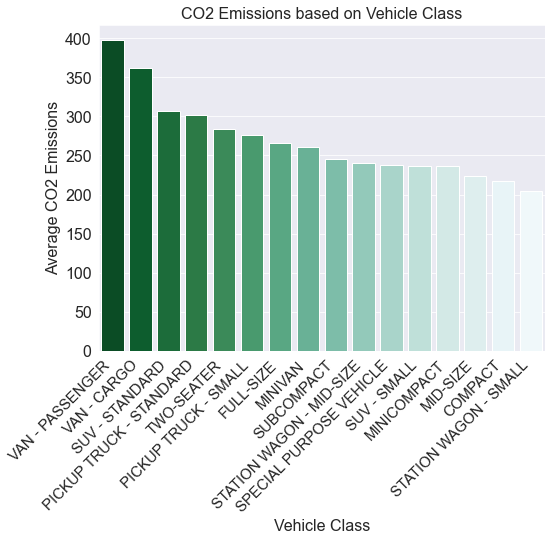

In [123]:
fig, c = plt.subplots(figsize = (8,6))
c = sns.barplot(x = 'Vehicle Class',y='CO2 Emissions(g/km)_mean',data=grouped_df_class,palette="BuGn_r")
c.set_xlabel('Vehicle Class', fontsize = 16)
c.set_ylabel ('Average CO2 Emissions', fontsize = 16)
c.set_title('CO2 Emissions based on Vehicle Class',fontsize=16)
plt.xticks(rotation=45,fontsize=15,ha='right')
plt.yticks(fontsize=16)
plt.show()

In [124]:
#grouping the data by Engine Size(L) and Cylinders
grouped_df_engine = df.groupby(['Engine Size(L)','Cylinders']).agg({'CO2 Emissions(g/km)': ['mean']})
grouped_df_engine.columns = ['CO2 Emissions(g/km)_mean']
grouped_df_engine=grouped_df_engine.reset_index()
grouped_df_engine.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(5)

,Engine Size(L),Cylinders,CO2 Emissions(g/km)_mean
63,8.0,16,522.000000
62,6.8,10,488.000000
58,6.5,12,451.176471
53,6.0,8,428.517241
61,6.8,8,424.428571


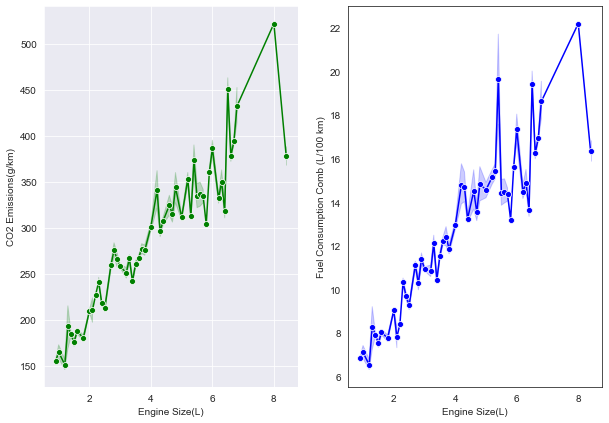

In [94]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.set_style('white')
p=sns.lineplot(x='Engine Size(L)',y='CO2 Emissions(g/km)',data=df,color='g',marker='o')

plt.subplot(1,2,2)
sns.set_style('white')
p=sns.lineplot(x='Engine Size(L)',y='Fuel Consumption Comb (L/100 km)',data=df,color='b',marker='o')


From this graph, it can be seen that CO2 Emissions(g/km) and Fuel Consumption Comb are basically displaying the same result and show the same pattern for the same independent variable('Engine Size(L)') given.

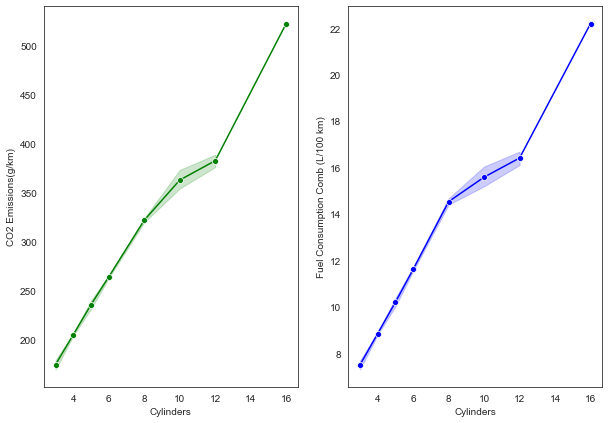

In [95]:
#Line graph for the same independent variable
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.set_style('white')
p=sns.lineplot(x='Cylinders',y='CO2 Emissions(g/km)',data=df,color='g',marker='o')

plt.subplot(1,2,2)
sns.set_style('white')
p=sns.lineplot(x='Cylinders',y='Fuel Consumption Comb (L/100 km)',data=df,color='b',marker='o')

From this graph, it can be seen that CO2 Emissions(g/km) and Fuel Consumption Comb are basically displaying the same result and show the same pattern for the same independent variable('Cylinders') given. Although Cylinders is a discrete feature, in this case it used to see the pattern between the independent and dependent variable and confirm that Fuel Consumption Comb(L/100 km) is the same as CO2 Emissions(L/100km)

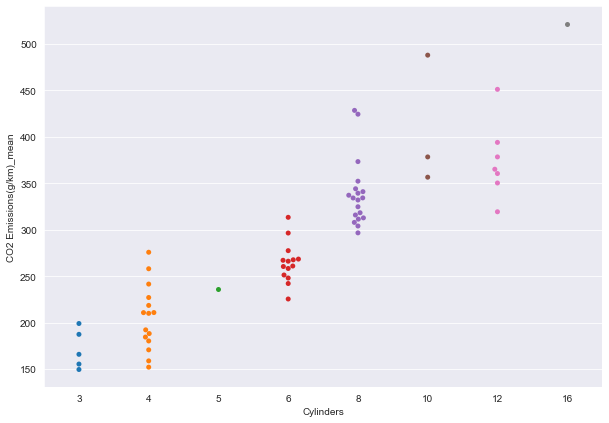

In [96]:
#swarmplot between cylinder and co2 emissions
plt.figure(figsize=(10,7))
sns.set_style('darkgrid')

_=sns.swarmplot(data=grouped_df_engine, x='Cylinders', y='CO2 Emissions(g/km)_mean')
plt.show()

In [97]:
#grouping just based on cylinders alone
grouped_df_cylinder = df.groupby(['Cylinders']).agg({'CO2 Emissions(g/km)': ['mean']})
grouped_df_cylinder.columns = ['CO2 Emissions(g/km)_mean']
grouped_df_cylinder=grouped_df_cylinder.reset_index()
grouped_df_cylinder.sort_values(by='CO2 Emissions(g/km)_mean',ascending=False).head(5)

,Cylinders,CO2 Emissions(g/km)_mean
7,16,522.000000
6,12,382.290076
5,10,362.600000
4,8,321.711966
3,6,264.091662


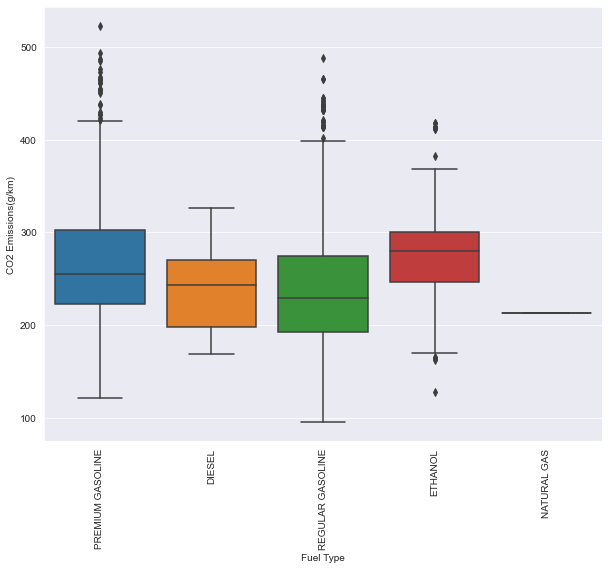

In [98]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation='vertical',fontsize=10)
plt.xlabel('Fuel Type',fontsize=10)
plt.ylabel('CO2 Emissions(g/km)',fontsize=10);

In [99]:
#grouping based on Fuel Type
grouped_df_fuel = df.groupby(['Fuel Type']).agg({'CO2 Emissions(g/km)': ['sum','count','mean','median']})
grouped_df_fuel.columns = ['CO2 Emissions_sum', 'Total Number of Vehicles','C02 Emissions Mean','C02 Emissions Median']
grouped_df_fuel=grouped_df_fuel.reset_index().sort_values(by='C02 Emissions Median',ascending=False)
grouped_df_fuel.head(10)

,Fuel Type,CO2 Emissions_sum,Total Number of Vehicles,C02 Emissions Mean,C02 Emissions Median
1,ETHANOL,89798,325,276.301538,280.0
3,PREMIUM GASOLINE,702901,2641,266.149565,255.0
0,DIESEL,34402,146,235.630137,243.5
4,REGULAR GASOLINE,680250,2878,236.362057,229.0
2,NATURAL GAS,213,1,213.000000,213.0


Although research has proven that ethanol produces less carbon dioxide emissions in comparison to other fuel types, this data is showing differing results. This can be due to incorrect collection of data, or that only 325 data were collected for cars that use ethanol as a fuel type, in comparison to 1000+ for premium gasoline and regular gasoline which somehow skews the result in favor of gasoline fuel type emitting less carbon dioxide on average.

In [155]:
fuel_e=df.loc[df['Fuel Type'] == 'ETHANOL']
fuel_e.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(2)
fuel_e.shape


(325, 12)

In [156]:
fuel_p=df.loc[df['Fuel Type'] == 'PREMIUM GASOLINE']
fuel_p.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(2)
fuel_p.shape

(2641, 12)

In [157]:
fuel_r=df.loc[df['Fuel Type'] == 'REGULAR GASOLINE']
fuel_r.sort_values(by='Fuel Consumption City (L/100 km)', ascending=False).head(2)
fuel_r.shape

(2878, 12)

In [103]:
fig = px.histogram(df, 
                   x='Fuel Consumption Comb (L/100 km)', 
                   marginal='box', 
                   color='Fuel Type',  
                   title='Distribution')
fig.update_layout(bargap=0.1)
fig.show()

The energy content of ethanol is about 33% less than pure gasoline therefore more quantity(L) needs to be burned for ethanol to produce the same amount of energy as a pure form of gasoline. This graph is showing the distribution of different fuel types and their fuel consumption. Ethanol has higher fuel consumption on average in comparison to other fuel types 

In [104]:
fig = px.histogram(df, 
                   x='CO2 Emissions(g/km)', 
                   marginal='box', 
                   color='Fuel Type',  
                   title='Distribution')
fig.update_layout(bargap=0.1)
fig.show()

<Figure size 1080x504 with 0 Axes>

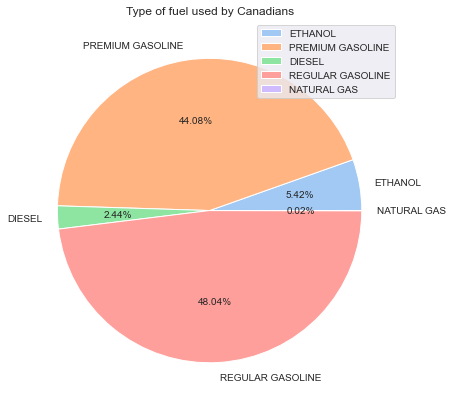

In [108]:
plt.figure(figsize=(15,7))
data = grouped_df_fuel.iloc[:,2]
labels = grouped_df_fuel.iloc[:,0]
plt.figure(figsize=(9,7))
colors = sns.color_palette('pastel')
plt.pie(data, labels = labels, colors = colors, autopct='%0.2f%%')
plt.title('Type of fuel used by Canadians')
first_legend = plt.legend(labels,loc = 1)
plt.show();

From this pie chart, 48.04% of Canadians use Regular gasoline.

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='Density'>

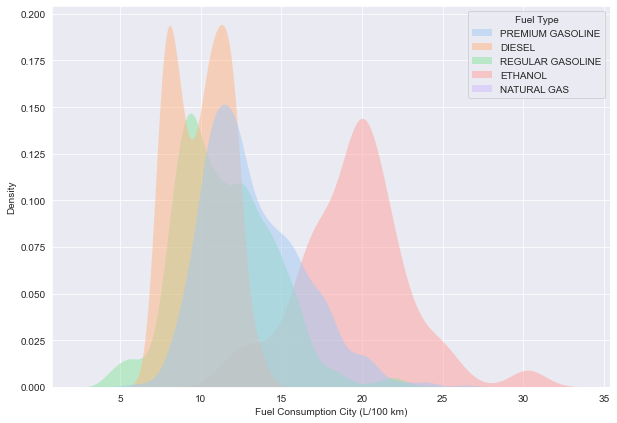

In [106]:
plt.figure(figsize=(10,7))
x=df.iloc[:,8]
sns.kdeplot(palette='pastel',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)

/Users/sidrakamal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



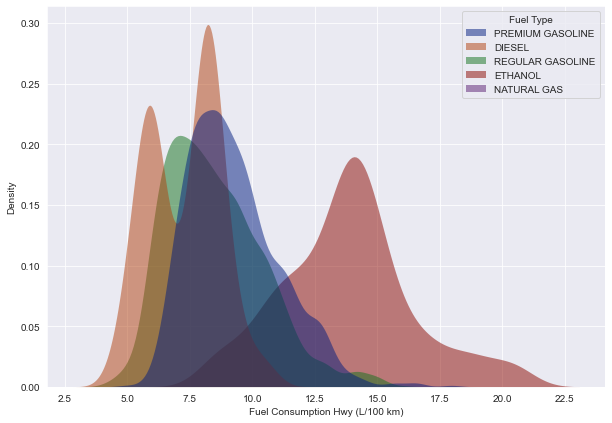

In [109]:
plt.figure(figsize=(10,7))
x=df.iloc[:,9]
g=sns.kdeplot(palette='dark',
   data=df, x=x, hue="Fuel Type",
   fill=True, common_norm=False,
   alpha=.5, linewidth=0)
plt.show(g)

From these kernel density plot, it can be seen that Fuel Consumption in Highway is less than Fuel Consumption in City for all types of fuels and this is due to less traffic and less vehicles on highway.

In [160]:
fig = px.scatter(df, x="Engine Size(L)", y="Fuel Consumption Comb (L/100 km)",
                 color="Fuel Type",
                 size='CO2 Emissions(g/km)')
  
fig.show()

Interesting pattern seen from this scatterplot is that increase in Engine size is showing increase in Fuel Consumption for every fuel type

In [161]:
fig = px.scatter(df, x="Engine Size(L)", y="Fuel Consumption Comb (L/100 km)",
                 color="Transmission_Type",
                 size='CO2 Emissions(g/km)')
  
fig.show()

<AxesSubplot:xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='CO2 Emissions(g/km)'>

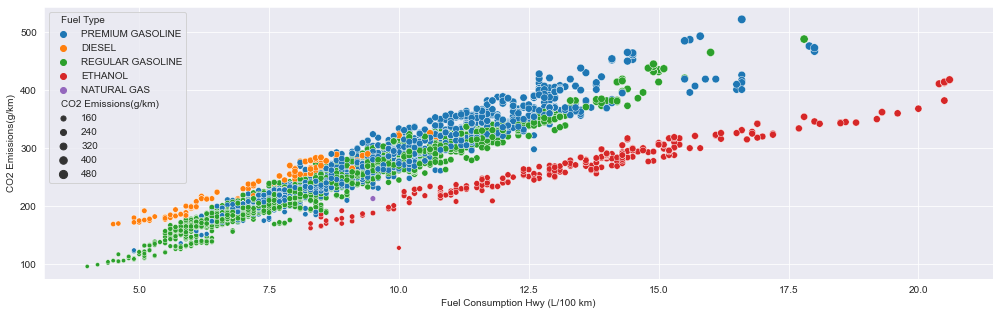

In [114]:
plt.figure(figsize=(17,5))
sns.scatterplot(data=df,x='Fuel Consumption Hwy (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

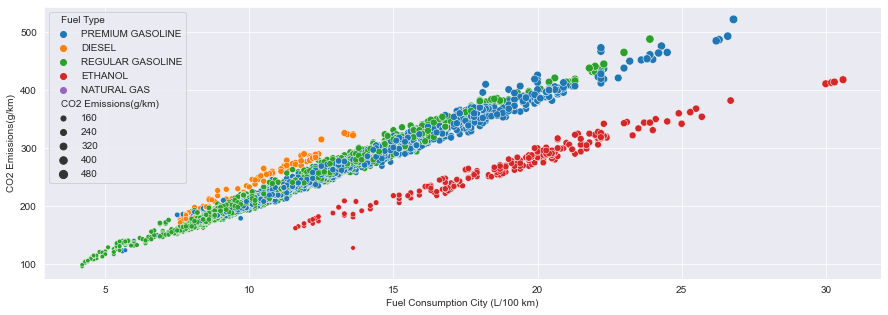

In [113]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption City (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

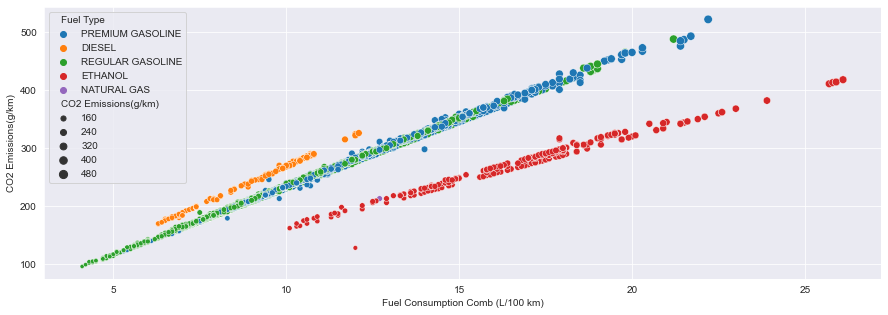

In [115]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)',hue='Fuel Type',size='CO2 Emissions(g/km)')

<AxesSubplot:>

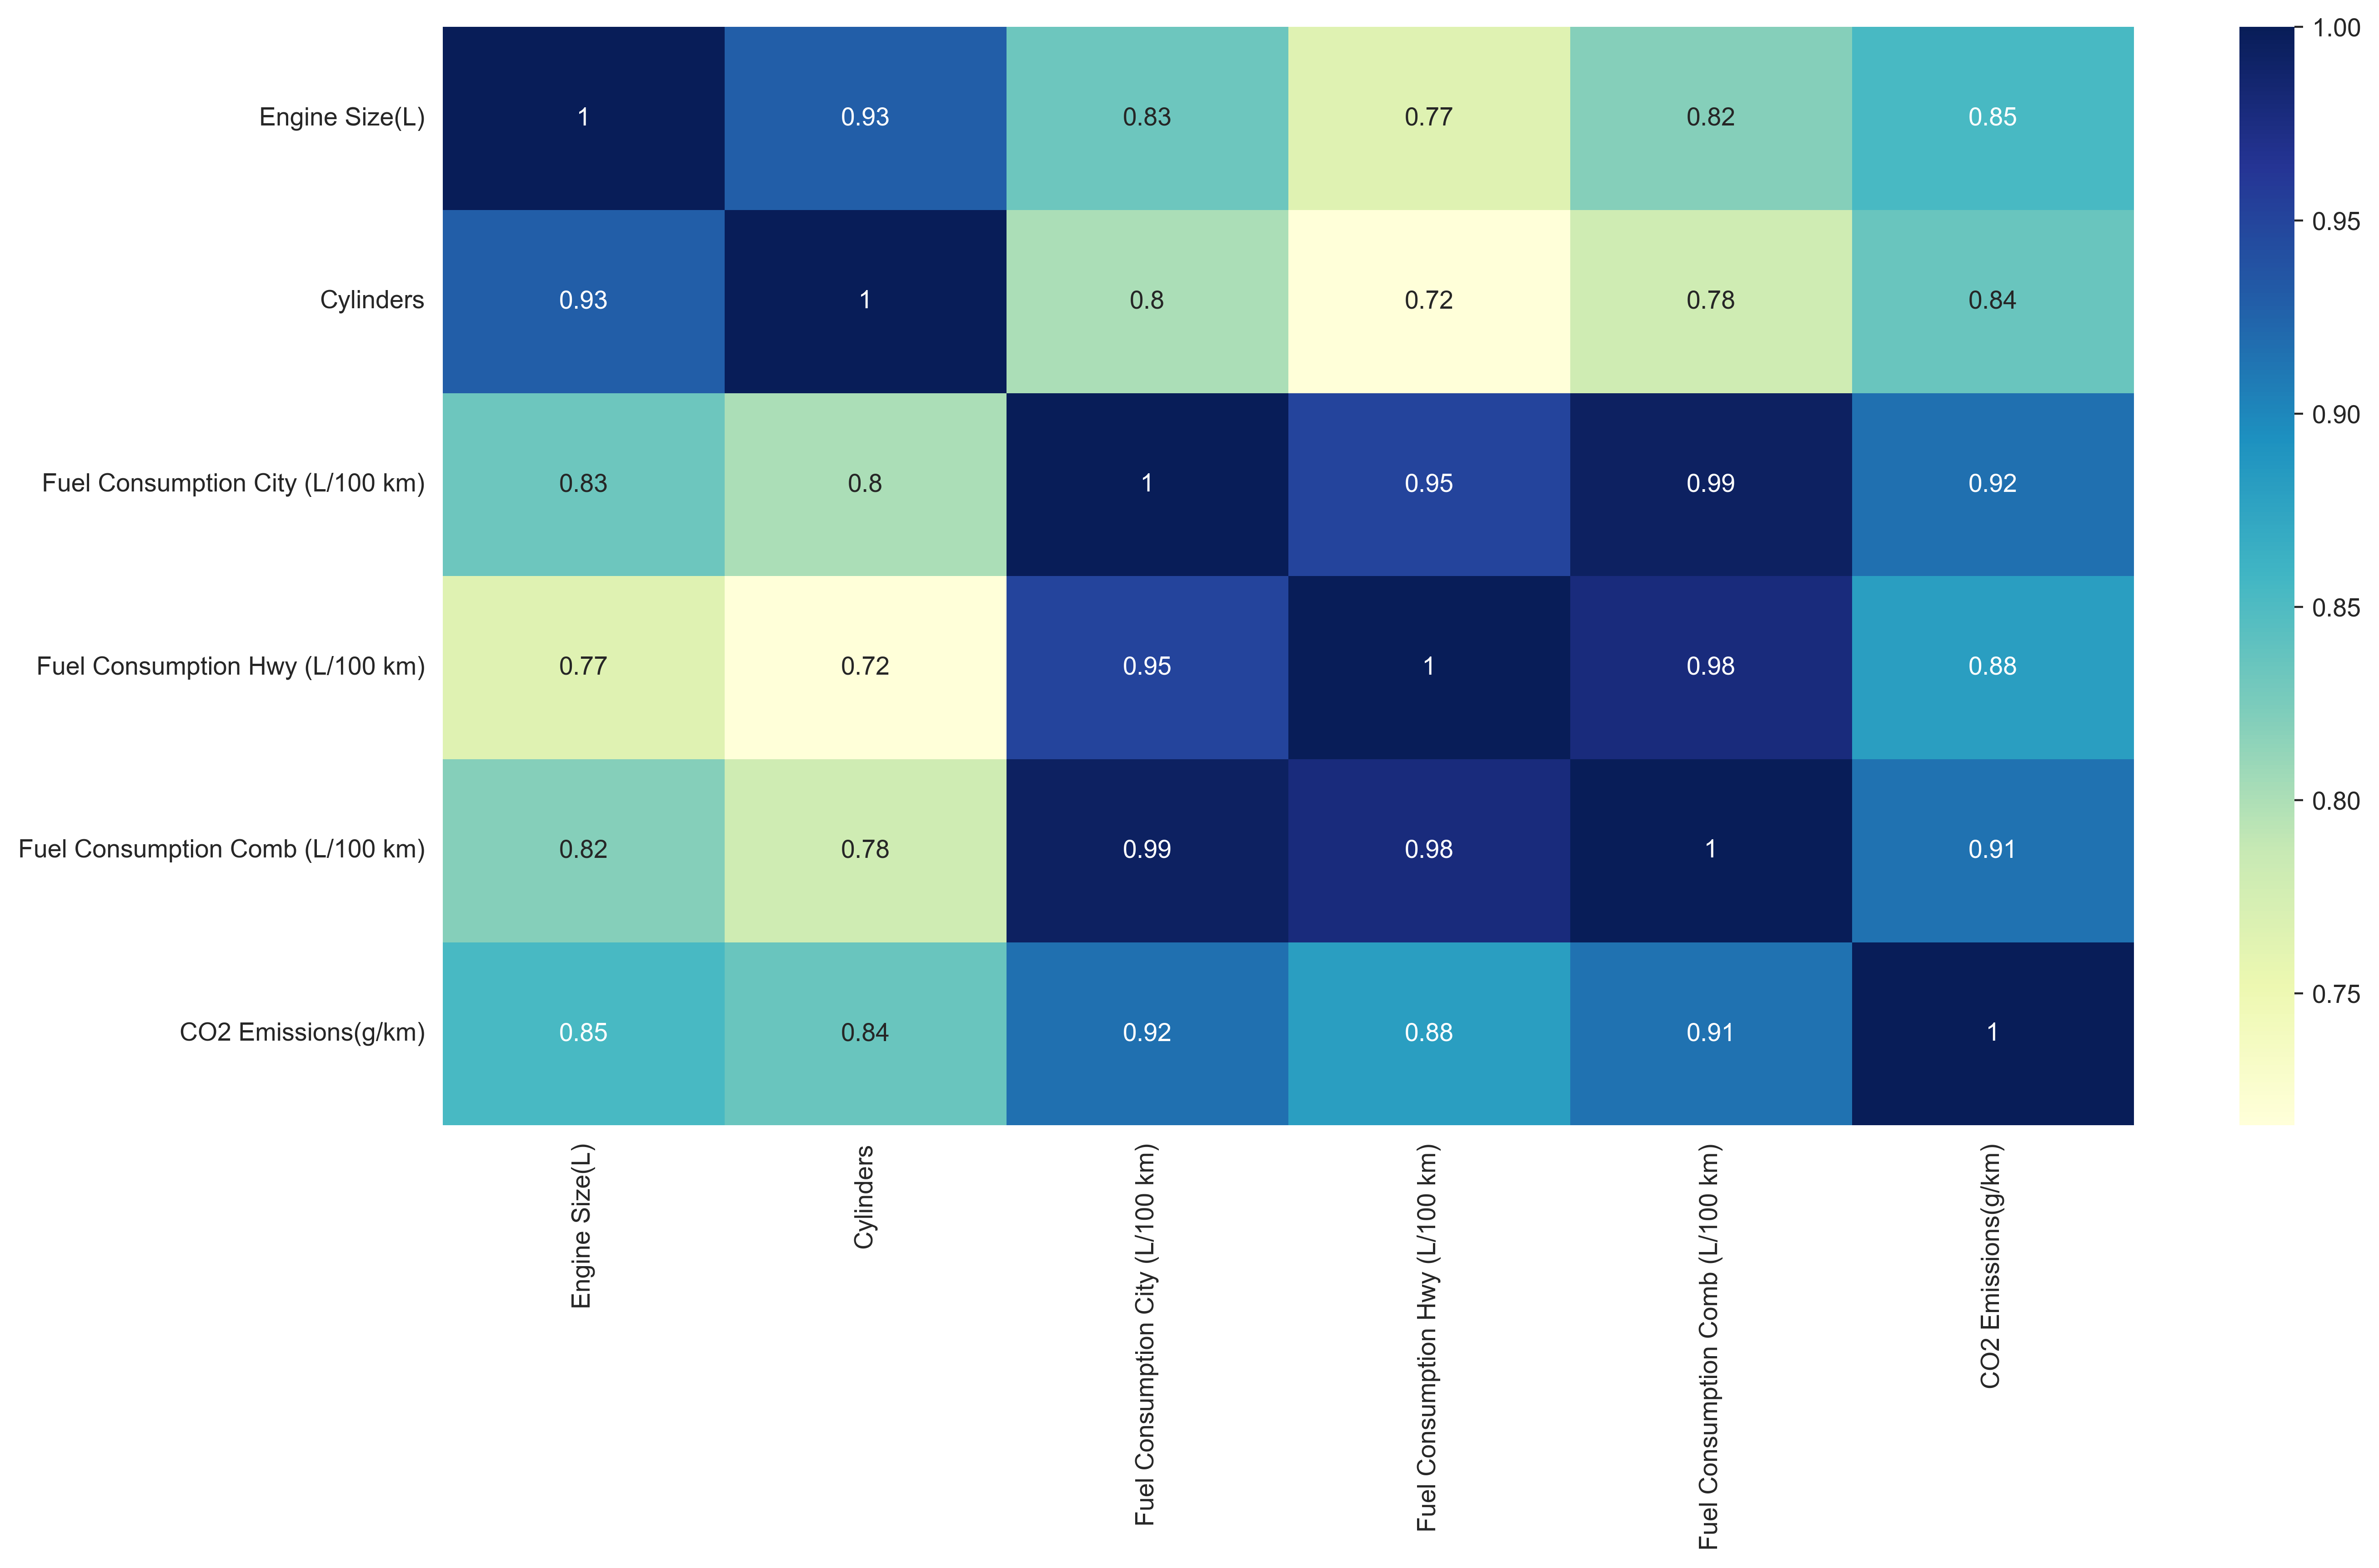

In [134]:
plt.figure(figsize = (15,8),dpi=400)
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

## CONCLUSION

* Ford car brand is the most popular choice amongst Canadians
* Bugatti, Lamborghini and Rolls Royce are some of the highest CO2 Emissions brand
* Van, SUV and Pickup Trucks have higher CO2 emissions in general compared to other compact vehicles classes
* Ethanol produced the highest CO2 Emission on average and also had the highest fuel consumption. This is surprising but upon closer look at data, only 325 data were collected for ethanol fuel in comparison to 2641 data collected for premium gasoline and 2878 data collected for regular gasoline. This can introduce some bias in the data.
* The increase of engine size is mainly for performance and therefore sacrifices the optimizations for fuel efficiency.
* Very clear relationship seen in the scatterplot that as the engine size increases, the fuel consumption goes up as well on a L/100km basis.
* Clear relationship seen in swarmplot for increase in cylinder size and fuel consumption
* Fuel Consumption is higher in City in comparison to the highways. This could be due to more traffic and traffic lights as well which leads to more use of breaks.
* Scatterplot shows that manual transmission has on average less carbon dioxide emissions but further investigation needs to be done to verify this claim.
